In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Initial conditions

In [23]:
# Parameters for the oscillator
m = 1.0  # mass (kg)
k = 10.0  # spring constant (N/m)

# Initial conditions
x0 = 1.0  # initial displacement (m)
v0 = 0.0  # initial velocity (m/s)

# Time range for the simulation
t_start = 0.0
t_end = 10.0
t_points = 1000
t_eval = np.linspace(t_start, t_end, t_points)

### Differential Equation for Hooke's Law

In [24]:
def damped_oscillator(t, y, m, c, k):
    x, v = y
    dxdt = v
    dvdt = -c/m * v - k/m * x
    return [dxdt, dvdt]

In [25]:
# Function to solve and plot the results
def solve_and_plot_damped(c, case_name):
    sol = solve_ivp(damped_oscillator, [t_start, t_end], [x0, v0], args=(m, c, k), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'{case_name} - Displacement (x)')
    plt.plot(sol.t, sol.y[1], label=f'{case_name} - Velocity (v)')
    plt.title(f'Damped Harmonic Oscillator - {case_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

### When there is no damping force

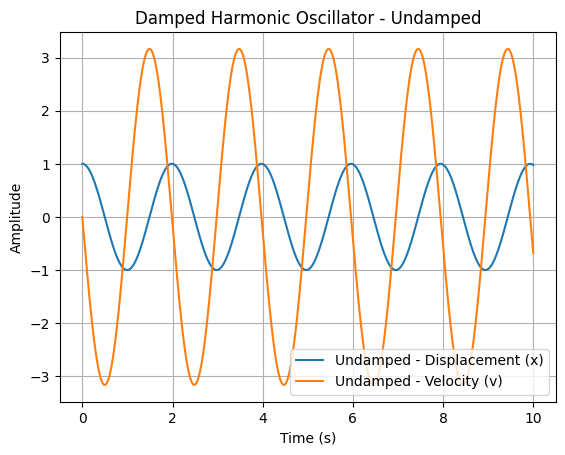

In [26]:
# Undamped case: c = 0
c_undamped = 0.0
solve_and_plot_damped(c_undamped, 'Undamped')

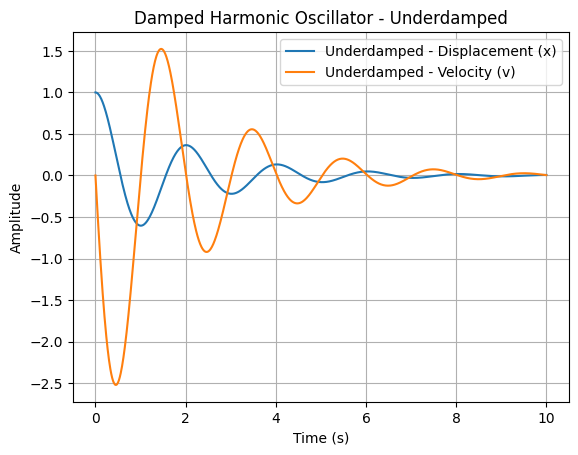

In [27]:
# Underdamped case: c^2 < 4mk
c_underdamped = 1.0
solve_and_plot_damped(c_underdamped, 'Underdamped')

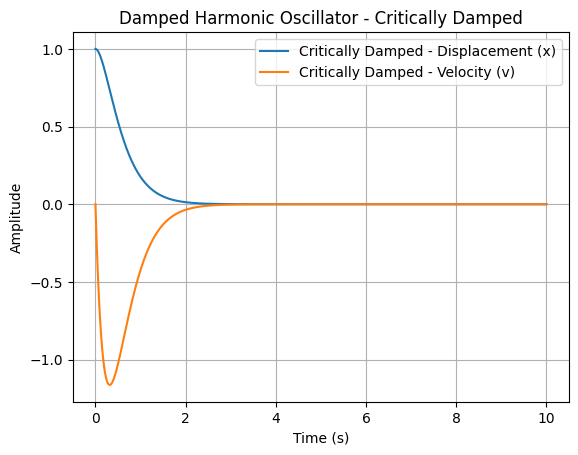

In [28]:
# Critically damped case: c^2 = 4mk
c_critically_damped = 2 * np.sqrt(m * k)
solve_and_plot_damped(c_critically_damped, 'Critically Damped')

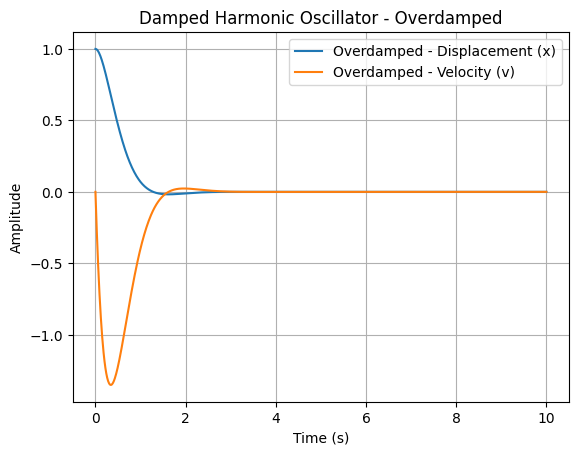

In [29]:
# Overdamped case: c^2 > 4mk
c_overdamped = 5.0
solve_and_plot_damped(c_overdamped, 'Overdamped')

In [30]:
F0 = 1.0  # amplitude of the forcing function
omega_0 = np.sqrt(k / m)  # natural frequency of the system

In [31]:
# Differential equations for forced vibrations
def forced_oscillator(t, y, m, c, k, F0, omega):
    x, v = y
    dxdt = v
    dvdt = -c/m * v - k/m * x + F0/m * np.cos(omega * t)
    return [dxdt, dvdt]

# Function to solve and plot the results
def solve_and_plot_forced(c, case_name, omega):
    sol = solve_ivp(forced_oscillator, [t_start, t_end], [x0, v0], args=(m, c, k, F0, omega), t_eval=t_eval)
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, sol.y[0], label=f'{case_name} - Displacement (x)')
    plt.plot(sol.t, sol.y[1], label=f'{case_name} - Velocity (v)')
    plt.title(f'{case_name} Forced Harmonic Oscillator')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

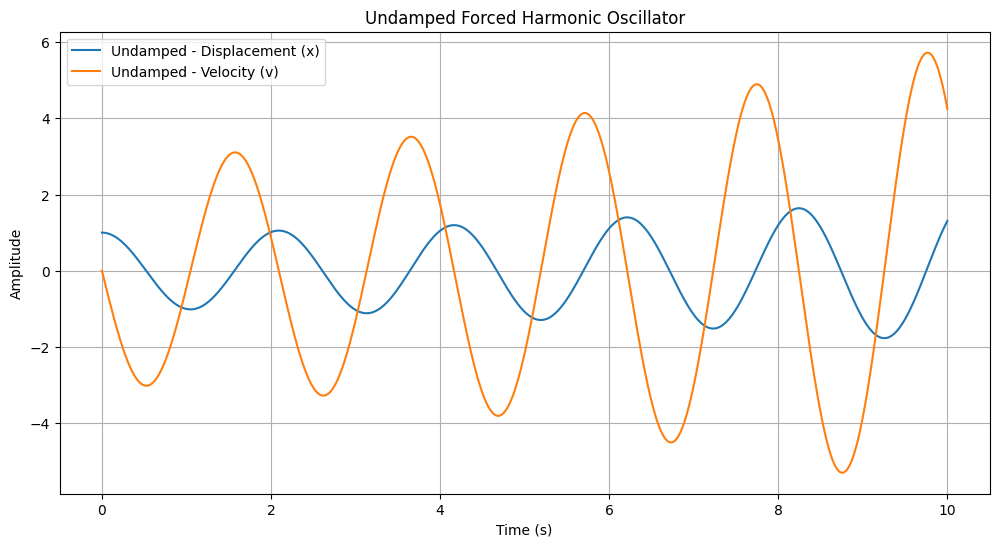

In [32]:
# Undamped case: c = 0
c_undamped = 0.0
solve_and_plot_forced(c_undamped, 'Undamped', omega_0)

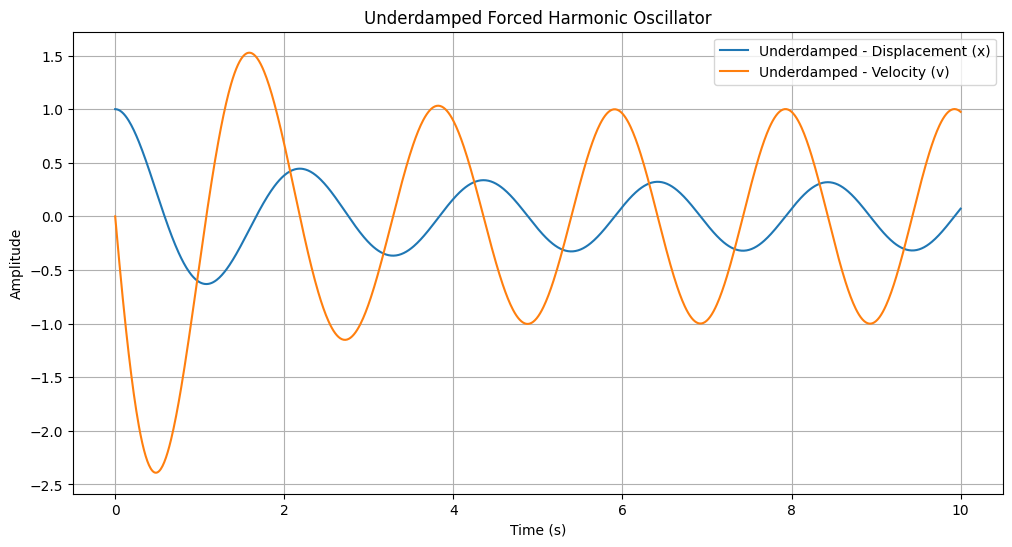

In [33]:
# Underdamped case: c^2 < 4mk
c_underdamped = 1.0
solve_and_plot_forced(c_underdamped, 'Underdamped', omega_0)

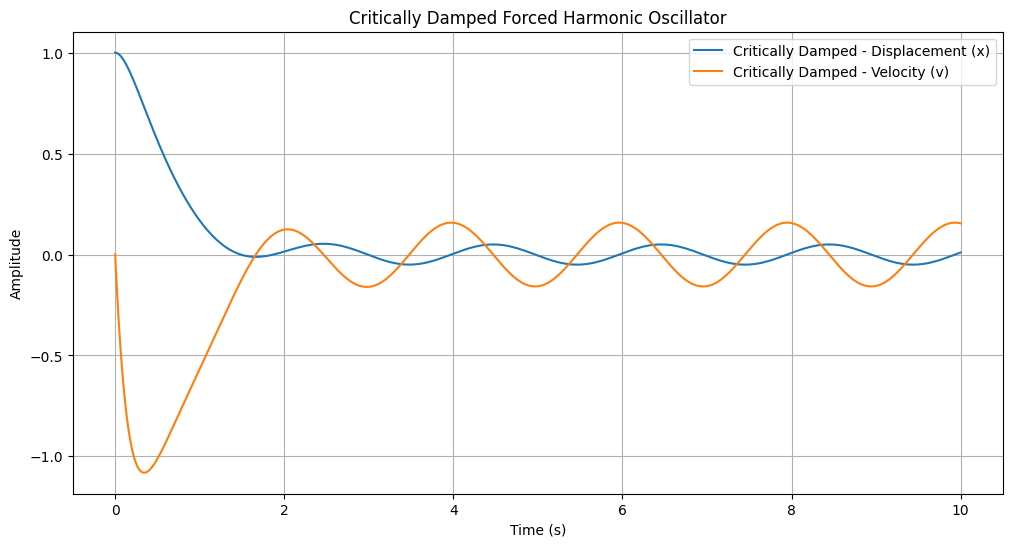

In [34]:
# Critically damped case: c^2 = 4mk
c_critically_damped = 2 * np.sqrt(m * k)
solve_and_plot_forced(c_critically_damped, 'Critically Damped', omega_0)

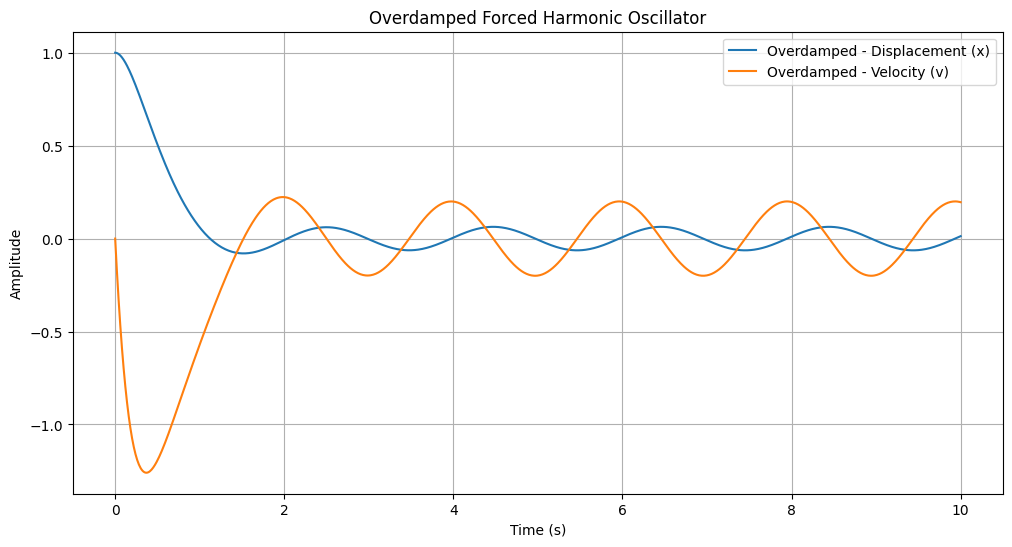

In [35]:
# Overdamped case: c^2 > 4mk
c_overdamped = 5.0
solve_and_plot_forced(c_overdamped, 'Overdamped', omega_0)

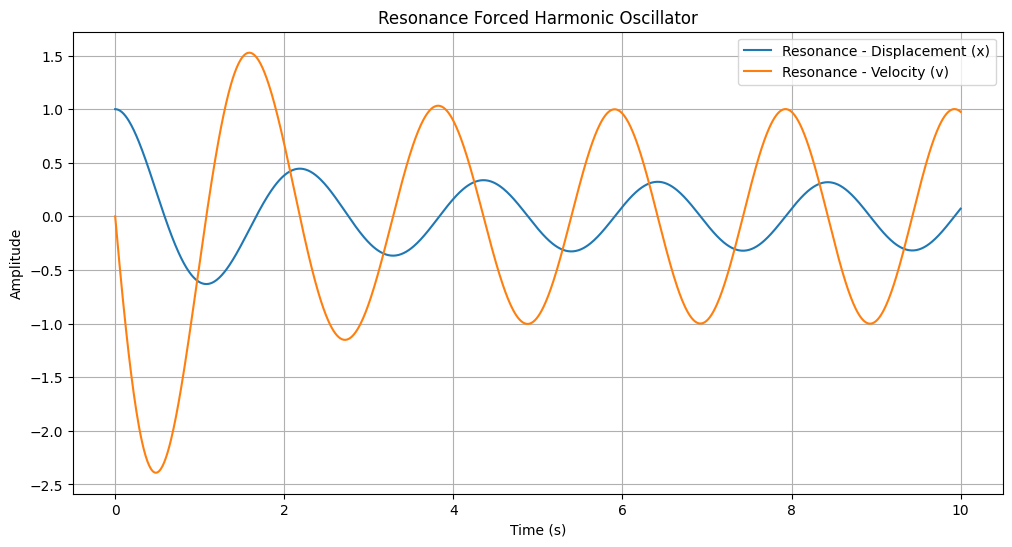

In [36]:
# Resonance case: forcing frequency equals natural frequency
solve_and_plot_forced(c_underdamped, 'Resonance', omega_0)